# Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df = pd.read_csv('/content/netflix1.csv')

# Informações dos Dados

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.shape

(8790, 10)

# Transformações dos Dados

In [ ]:
# Transformando as datas
f['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [ ]:
df['min']=df['duration'].fillna('0')
df['min']=df['min'].str.replace(' min','')
df['min']=df['min'].str.replace(' Season','')
df['min']=df['min'].str.replace(' Seasons','')
df['min']=df['min'].str.replace('s','')
df['min']=df['min'].astype(str).astype(int)
df['min']

0        90
1         1
2         1
3        91
4       125
       ... 
8785      2
8786      3
8787      1
8788      1
8789      1
Name: min, Length: 8790, dtype: int64

In [ ]:
features = ['title', 'duration']
durations = df[features]

durations['number_of_seasons'] = durations['duration'].str.replace(' Seasons', '')
durations['number_of_seasons'] = durations['number_of_seasons'].str.replace(' Season', '')
durations['number_of_seasons'] = durations['number_of_seasons'].str.replace(' min', '678')
durations['number_of_seasons']= durations['number_of_seasons'].astype(str).astype(int)

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,125


# Gráfico

### Frequência de programas de TV?

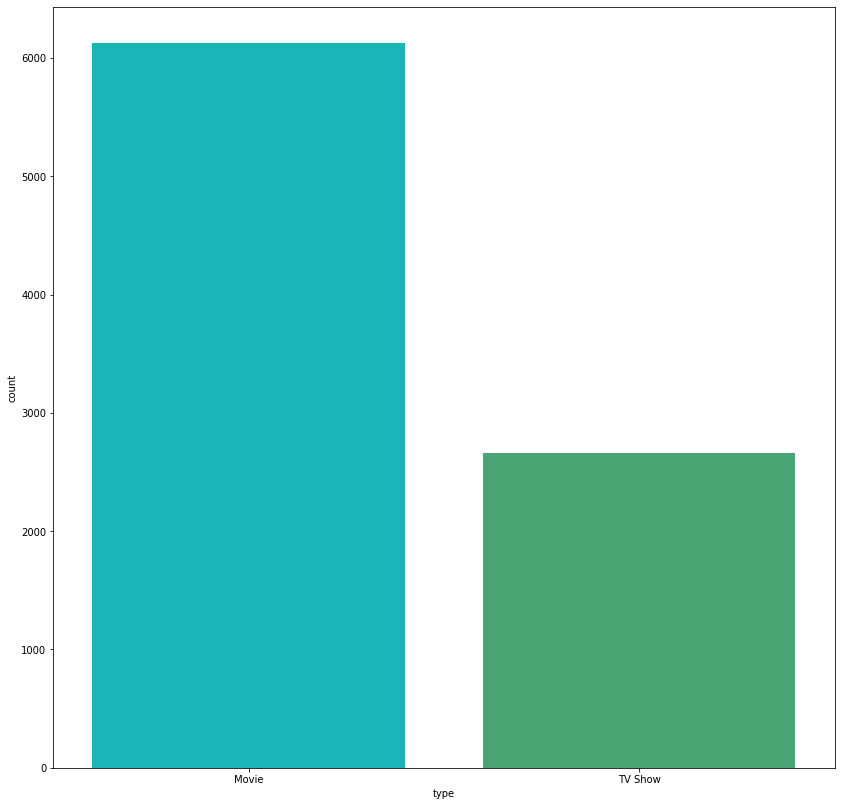

In [ ]:
color = ['#00CED1', '#3CB371']
sns.countplot(x=df['type'], palette=color)
plt.show()

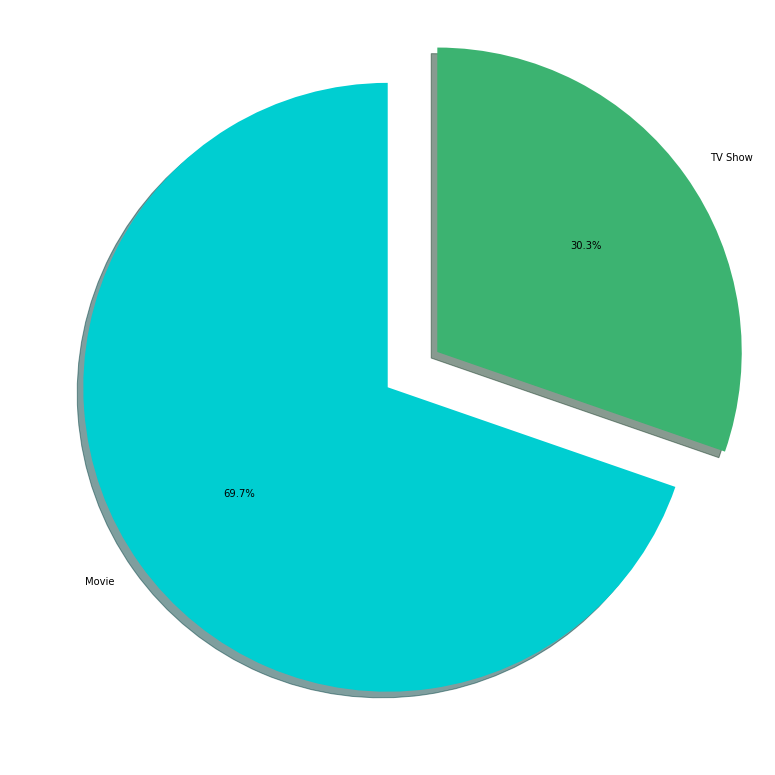

In [ ]:
valor = df['type'].value_counts()
labels = ['Movie','TV Show']
explode = (0,0.2)
color = ['#00CED1', '#3CB371']
plt.pie(valor, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=color)
plt.show()

### Quantos filmes adicionado ao longo dos anos ?

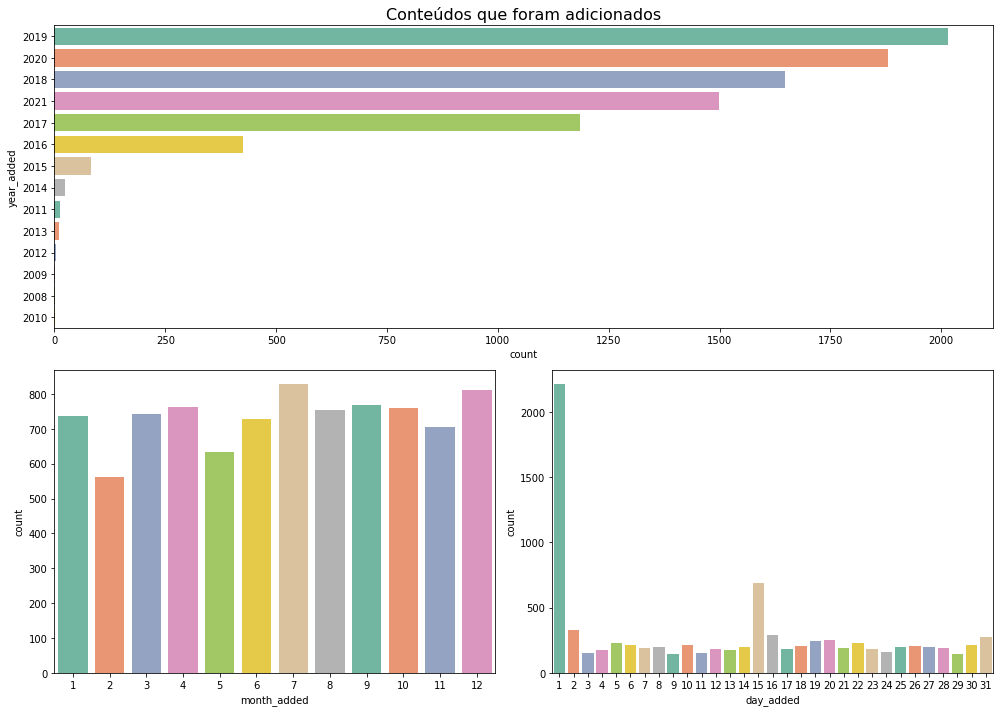

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14,10))
gs = GridSpec(2,2)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:,0])
ax3 = fig.add_subplot(gs[1:,1])

sns.countplot(y=df['year_added'], order=df['year_added'].value_counts().index,palette='Set2',ax=ax1)
ax1.set_title('Conteúdos que foram adicionados', fontsize=16)

sns.countplot(x=df['month_added'], palette='Set2',ax=ax2)

sns.countplot(x=df['day_added'], palette='Set2',ax=ax3)

plt.tight_layout()
plt.show()

In [ ]:
df['date_added'].value_counts().reset_index()

,index,date_added
0,2020-01-01,110
1,2019-11-01,91
2,2018-03-01,75
3,2019-12-31,74
4,2018-10-01,71
...,...,...
1708,2015-06-26,1
1709,2015-06-23,1
1710,2015-06-01,1
1711,2015-05-29,1


### Ano de Lançamento

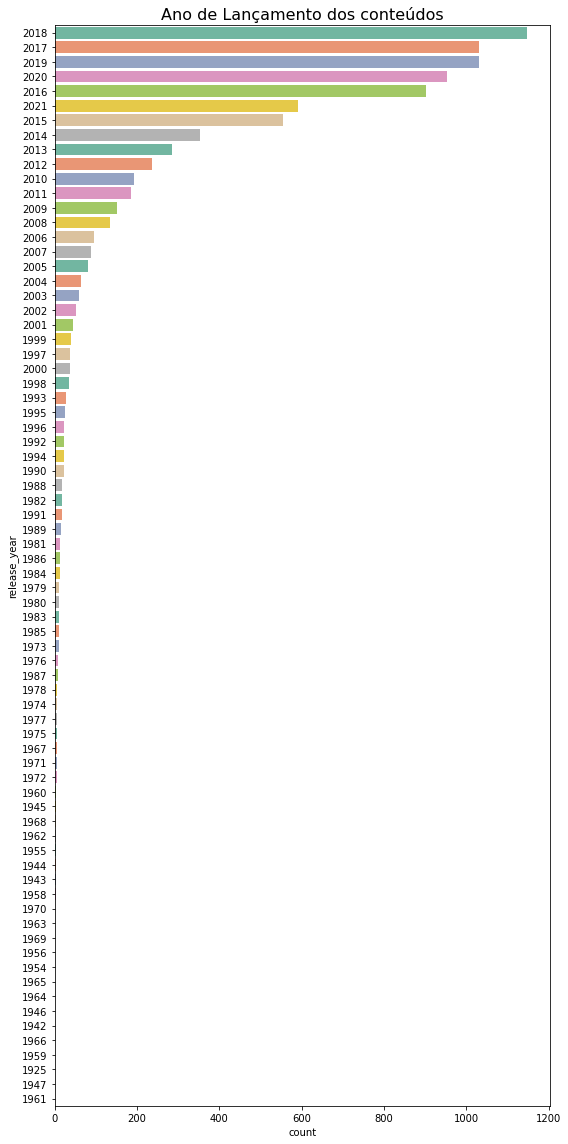

In [ ]:
plt.figure(figsize=(8,16))
sns.countplot(y=df['release_year'], order=df['release_year'].value_counts().index, palette='Set2')
plt.title('Ano de Lançamento dos conteúdos', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df['release_year'].value_counts().reset_index()

,index,release_year
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
...,...,...
69,1966,1
70,1959,1
71,1925,1
72,1947,1


### Qual o País que mais produz filmes?

In [ ]:
df['country'].value_counts().reset_index()

,index,country
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
...,...,...
81,Iran,1
82,West Germany,1
83,Greece,1
84,Zimbabwe,1


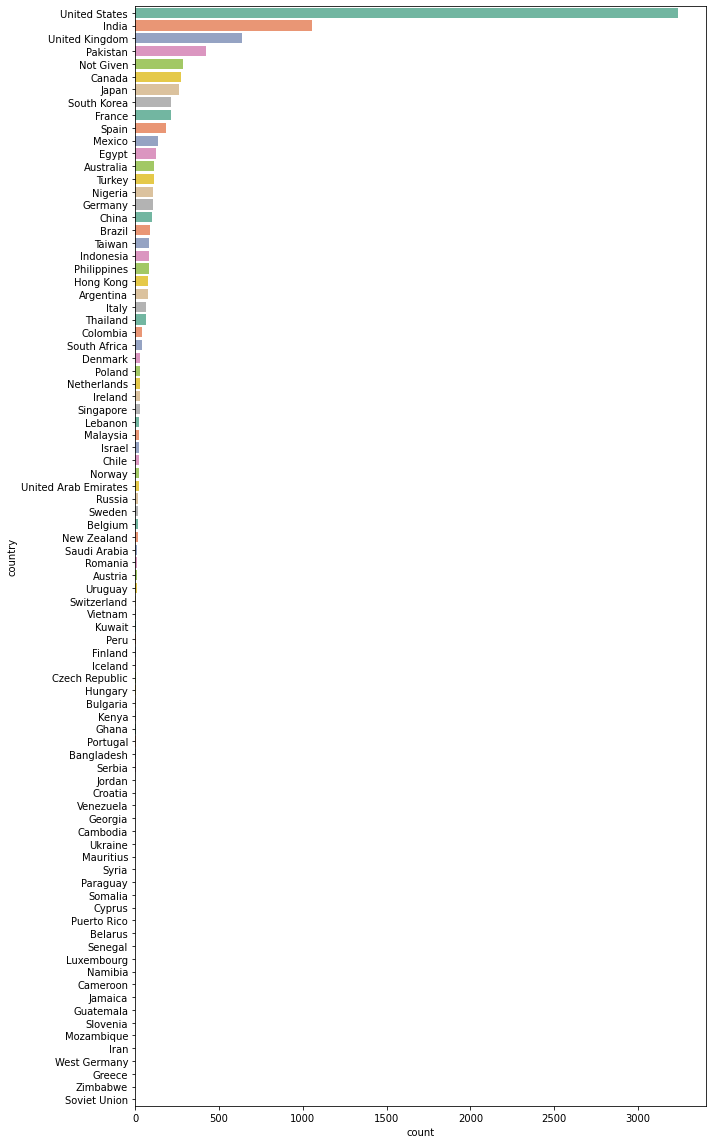

In [ ]:
plt.figure(figsize=(10,16))
sns.countplot(y=df['country'], order=df['country'].value_counts().index, palette='Set2')
plt.tight_layout()
plt.show()

In [ ]:
us = df[df['country'] == 'United States']

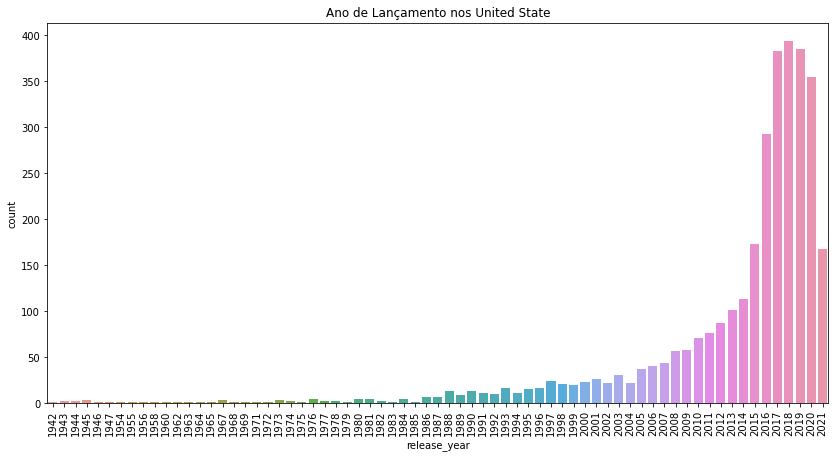

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=us['release_year'])
plt.title('Ano de Lançamento nos United State')
plt.xticks(rotation=90)
plt.show()

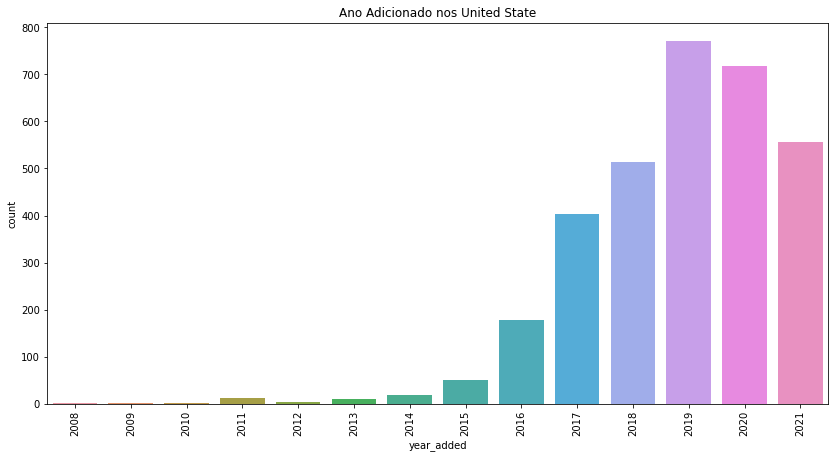

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=us['year_added'])
plt.title('Ano Adicionado nos United State')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('ANO DE LANÇAMENTO: 20 FILMES RECENTES DOS US.')
us[['title', 'release_year']].sort_values('release_year',ascending=False).head(20)

ANO DE LANÇAMENTO: 20 FILMES RECENTES DOS US.


,title,release_year
6644,Mighty Express,2021
6756,The Kominsky Method,2021
6712,Black Lightning,2021
1155,Operation Varsity Blues: The College Admission...,2021
6915,Cobra Kai,2021
1150,Nate Bargatze: The Greatest Average American,2021
1148,Deadly Illusions,2021
6740,"Fresh, Fried & Crispy",2021
6741,L.A.’s Finest,2021
6744,Sweet Tooth,2021


In [ ]:
print('ANO DE LANÇAMENTO: 20 FILMES ANTIGOS DOS US.')
us[['title', 'release_year']].sort_values('release_year',ascending=True).head(20)

ANO DE LANÇAMENTO: 20 FILMES ANTIGOS DOS US.


,title,release_year
5698,Prelude to War,1942
6037,The Battle of Midway,1942
6422,Undercover: How to Operate Behind Enemy Lines,1943
6510,WWII: Report from the Aleutians,1943
6491,Why We Fight: The Battle of Russia,1943
6218,The Memphis Belle: A Story of a\nFlying Fortress,1944
6406,Tunisian Victory,1944
6230,The Negro Soldier,1944
5545,Nazi Concentration Camps,1945
6874,Five Came Back: The Reference Films,1945


In [ ]:
print('DIRETORES MAIS ADICIONADOS')
us['director'].value_counts().reset_index().head(20)

DIRETORES MAIS ADICIONADOS


,index,director
0,Not Given,839
1,Marcus Raboy,16
2,Jay Karas,14
3,Jay Chapman,12
4,Martin Scorsese,12
5,Steven Spielberg,11
6,Shannon Hartman,8
7,Lance Bangs,8
8,Robert Rodriguez,8
9,Ryan Polito,8


In [ ]:
print('QUAL A CLASSIFICAÇÃO MAIS FREQUENTE?')
us['rating'].value_counts().reset_index()

QUAL A CLASSIFICAÇÃO MAIS FREQUENTE?


,index,rating
0,TV-MA,1000
1,R,538
2,TV-14,445
3,PG-13,366
4,TV-PG,271
5,PG,211
6,TV-Y7,129
7,TV-Y,122
8,TV-G,88
9,NR,35


In [ ]:
print('QUAIS AS 20 CATEGORIAS MAIS ADICIONADAS?')
us['listed_in'].value_counts().reset_index().head(20)

QUAIS AS 20 CATEGORIAS MAIS ADICIONADAS?


,index,listed_in
0,Documentaries,269
1,Stand-Up Comedy,216
2,"Children & Family Movies, Comedies",122
3,Kids' TV,107
4,Children & Family Movies,104
5,Dramas,100
6,Comedies,91
7,Action & Adventure,86
8,"Dramas, Independent Movies",82
9,Reality TV,73


### Lançamento por tipo de programação

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,125


In [ ]:
tv = df[df['type']=='TV Show']
movie = df[df['type'] == 'Movie']
col = 'year_added'

v1 = tv[col].value_counts().reset_index()
v1 = v1.rename(columns= {col : 'count', 'index': col})
v1['percent'] = v1['count'].apply(lambda x: 100*x/sum(v1['count']))
v1 = v1.sort_values(col)

v2 = movie[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count', 'index':col})
v2['percent'] = v2['count'].apply(lambda x: 100*x/sum(v2['count']))
v2 = v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1['count'], name='TV Shows', marker=dict(color='#00CED1'))

trace2 = go.Bar(x=v2[col], y=v2['count'], name='Movies', marker=dict(color='#3CB371'))

data = [trace1, trace2]

layout = go.Layout(title='Conteúdos adicionados ao longo dos anos', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
col = 'release_year'

v1 = tv[col].value_counts().reset_index()
v1 = v1.rename(columns= {col : 'count', 'index': col})
v1['percent'] = v1['count'].apply(lambda x: 100*x/sum(v1['count']))
v1 = v1.sort_values(col)

v2 = movie[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count', 'index':col})
v2['percent'] = v2['count'].apply(lambda x: 100*x/sum(v2['count']))
v2 = v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1['count'], name='TV Shows', marker=dict(color='#00CED1'))
trace2 = go.Bar(x=v2[col], y=v2['count'], name='Movie', marker=dict(color='#3CB371'))

data = [trace1, trace2]

layout = go.Layout(title='Conteúdo adicionado ao longo dos anos', legend= dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
col = 'month_added'

m1 = tv[col].value_counts().reset_index()
m1 = m1.rename(columns={col:'count', 'index':col})
m1['percent'] = m1['count'].apply(lambda x: 100*x/sum(m1['count']))
m1 = m1.sort_values(col)

m2 = movie[col].value_counts().reset_index()
m2 = m2.rename(columns={col:'count', 'index':col})
m2['percent'] = m2['count'].apply(lambda x: 100*x/sum(m2['count']))
m2 = m2.sort_values(col)

trace1 = go.Bar(x=m1[col], y=m1['count'], name='TV Show', marker=dict(color='#00CED1'))
trace2 = go.Bar(x=m2[col], y=m2['count'], name='Movie', marker=dict(color='#3CB371'))

data= [trace1, trace2]

layout = go.Layout(title='Qual mês o conteúdo é mais adicionado?', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

### Tipos de Avaliação?

In [ ]:
col = 'rating'

c1 = tv[col].value_counts().reset_index()
c1 = c1.rename(columns={col:'count', 'index':col})
c1['percent'] = c1['count'].apply(lambda x: 100*x/sum(c1['count']))
c1 = c1.sort_values(col)

c2 = movie[col].value_counts().reset_index()
c2 = c2.rename(columns={col:'count', 'index':col})
c2['percent'] = c2['count'].apply(lambda x: 100*x/sum(c2['count']))
c2 = c2.sort_values(col)

trace1 = go.Bar(x=c1[col], y=c1['count'], name='TV Show', marker=dict(color='#00CED1'))
trace2 = go.Bar(x=c2[col], y=c2['count'], name='Movies', marker=dict(color='#3CB371'))

data = [trace1, trace2]

layout = go.Layout(title='', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

### Quantas temporadas por serie?

In [ ]:
seasons = durations.loc[(durations['number_of_seasons'] >= 1) & (durations['number_of_seasons'] <= 17)]
t = ['title', 'number_of_seasons']
top = seasons[t]

top = top.sort_values(by='number_of_seasons', ascending=False)

In [ ]:
top.head(20)

,title,number_of_seasons
6697,Grey's Anatomy,17
1971,Supernatural,15
7987,NCIS,15
7816,COMEDIANS of the world,13
6884,Heartland,13
8164,Criminal Minds,12
8024,Trailer Park Boys,12
8391,Cheers,11
7018,LEGO Ninjago: Masters of Spinjitzu,10
8311,Danger Mouse: Classic Collection,10


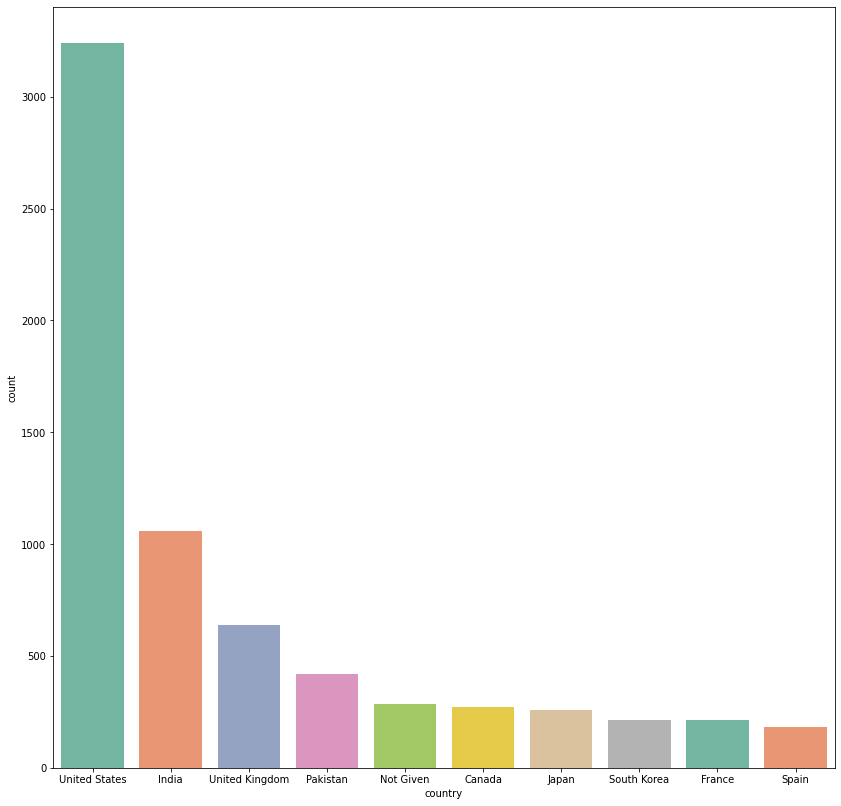

In [ ]:
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:10],palette='Set2')

### Qual a avaliação dos filmes?

In [ ]:
df['rating'].value_counts().reset_index()

,index,rating
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


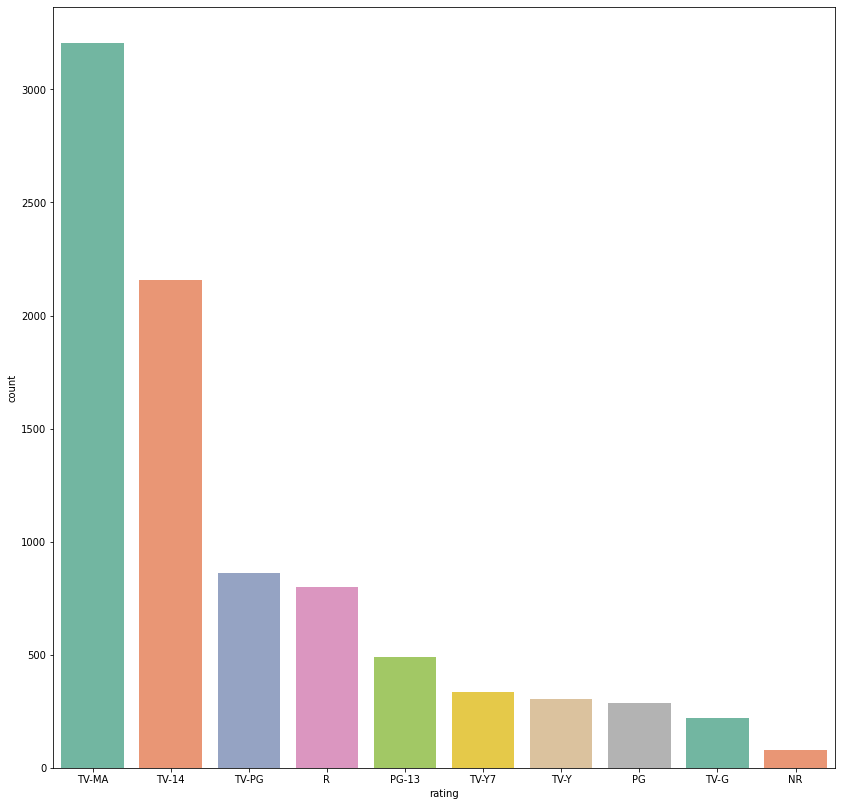

In [ ]:
sns.countplot(x=df['rating'], order=df['rating'].value_counts().index[0:10], palette='Set2')

### Qual o filme mais antigo?

In [ ]:
antigo = df.sort_values('release_year', ascending=True)
antigo = antigo[antigo['duration'] != ""]
antigo[['title', 'release_year']][:15]

,title,release_year
421,Pioneers: First Women Filmmakers*,1925
5698,Prelude to War,1942
6037,The Battle of Midway,1942
6510,WWII: Report from the Aleutians,1943
6422,Undercover: How to Operate Behind Enemy Lines,1943
6491,Why We Fight: The Battle of Russia,1943
6230,The Negro Soldier,1944
6218,The Memphis Belle: A Story of a\nFlying Fortress,1944
6406,Tunisian Victory,1944
6874,Five Came Back: The Reference Films,1945


### Qual o filme mais recente?

In [ ]:
recente = df.sort_values('release_year', ascending=False)
recente = recente[recente['duration'] != ""]
recente[['title', 'release_year']][:15]

,title,release_year
6871,Nadiya Bakes,2021
541,A Second Chance: Rivals!,2021
531,Resort to Love,2021
532,Rurouni Kenshin: The Beginning,2021
533,Mimi,2021
534,Bankrolled,2021
6877,Hache,2021
536,Kingdom: Ashin of the North,2021
6878,Invisible City,2021
6880,Firefly Lane,2021


### Quantos minutos de duração?

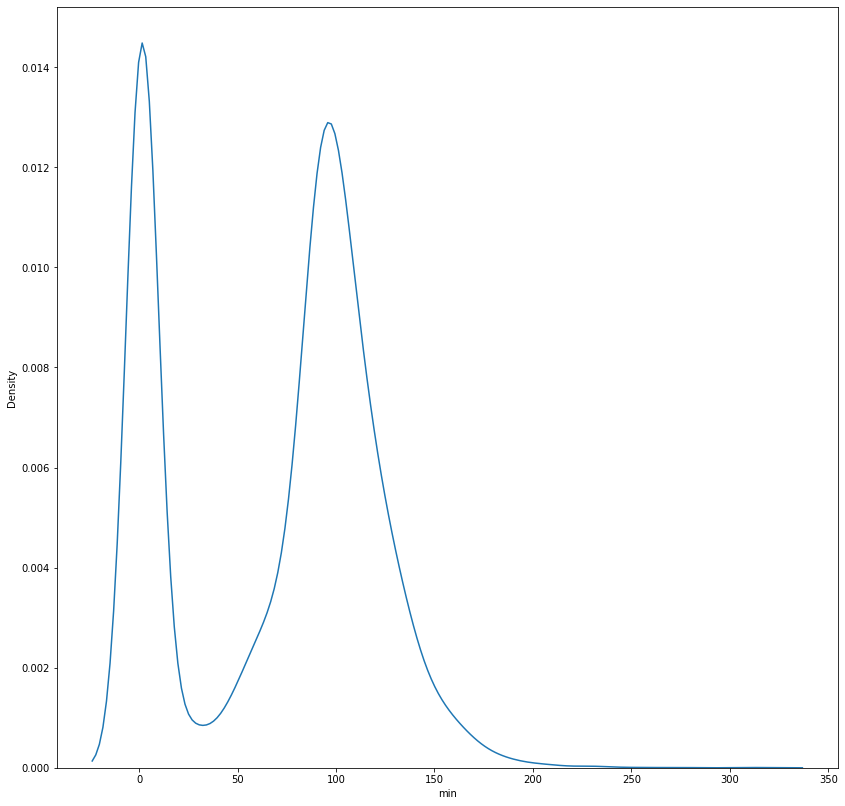

In [ ]:
sns.kdeplot(x=df['min'])

In [ ]:
def text_freq(data):
  tipo = list(data)
  gen = []

  for i in tipo:
      i = list(i.split(','))
      for j in i:
          gen.append(j.replace(' ',''))
  genero = Counter(gen)
  tabela = pd.DataFrame({'Words':genero.keys(), 'Count':genero.values()}).sort_values('Count', ascending=False)
  return tabela

In [ ]:
text_freq(df['listed_in'])

,Words,Count
11,InternationalMovies,2752
9,Dramas,2426
8,Comedies,1674
2,InternationalTVShows,1349
0,Documentaries,869
28,Action&Adventure,859
4,TVDramas,762
10,IndependentMovies,756
7,Children&FamilyMovies,641
18,RomanticMovies,616


In [ ]:
text_freq(df['director'])

,Words,Count
9,NotGiven,2588
255,RajivChilaka,23
2688,JanSuter,21
2687,RaúlCampos,19
1221,AlastairFothergill,19
...,...,...
2026,Parthiban,1
2027,ScottMcAboy,1
2028,RaymieMuzquiz,1
2029,StuLivingston,1


### Nuvem de Palavras

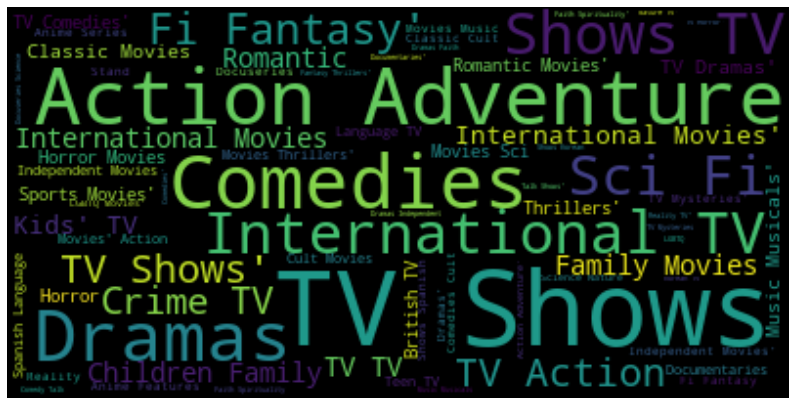

In [ ]:
texto = df['listed_in']
text = list(set(texto))
plt.rcParams['figure.figsize'] = (14,14)

wordcloud = WordCloud(max_words=1000000, background_color='black').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

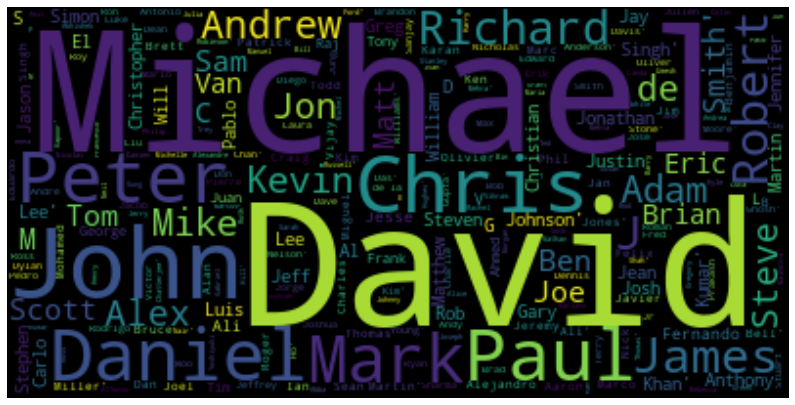

In [ ]:
diretor = df['director']
text = list(set(diretor))
plt.rcParams['figure.figsize'] = (14,14)

wordcloud = WordCloud(max_words=1000000, background_color='black').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

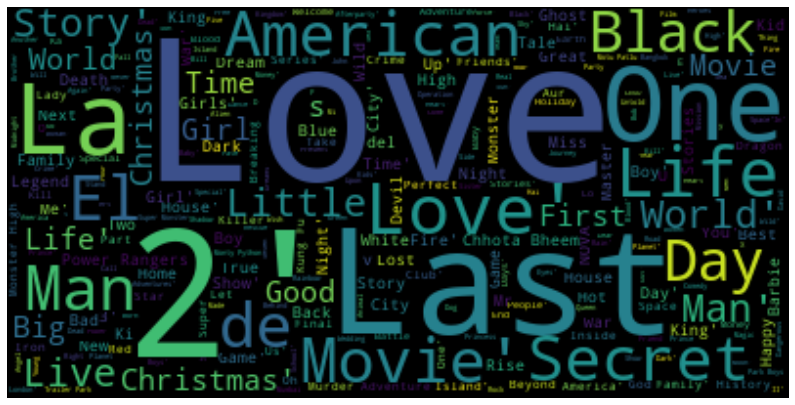

In [ ]:
text = df['title']
text = list(set(text))
plt.rcParams['figure.figsize'] = (14,14)

wordcloud = WordCloud(max_words=1000000, background_color='black').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()